In [120]:
#importing packages
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pprint
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans,SpectralClustering
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score


# a) Functions

i) K-means

In [92]:
def Kmeans_custom_k(X,K):
    kmeans_model = KMeans(n_clusters= K, init='random',  max_iter=250, random_state=0)
    y_predictions = kmeans_model.fit_predict(X)
    return y_predictions

ii) Spectral clustering

In [114]:
def spectral_custom_k(X,K,g):
    spectral_model = SpectralClustering(n_clusters=K, gamma = g, affinity='rbf')
    y_predictions = spectral_model.fit_predict(X)
    return y_predictions

# b) Kmeans with K =2

In [95]:
#reading data
data = np.load('./dataset2.npz')
# we notice 2 files X (2d) and Y in the data
data.files

['X', 'Y']

In [96]:
y_true=data['Y'].flatten()

<function matplotlib.pyplot.show(close=None, block=None)>

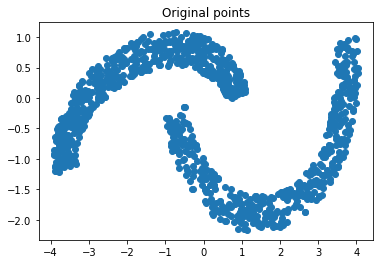

In [98]:
x_coordinate =[]
y_coordinate = []

#iterating through X file
for (x,y) in data['X']:
    x_coordinate.append(x)
    y_coordinate.append(y)

#creating a dictionary 
data_dict = {'x_co':x_coordinate,'y_co':y_coordinate}

#scatter plot for x values
plt.scatter(x_coordinate,y_coordinate)
plt.title("Original points")
plt.show

In [134]:
y_pred = Kmeans_custom_k(data['X'],2)
print(y_pred)

[1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 

In [135]:
print("confusion matrix for kmeans with k=2\n", confusion_matrix(y_true, y_pred))
print("Accuracy for kmeans with k=2\n", format(accuracy_score(y_true, y_pred),'.1%'))
print("Homogeneity score for kmeans with k=2\n", format(homogeneity_score(y_true,y_pred),'.2f'))
print("Mutual Info Score for kmeans with k=2\n", format(mutual_info_score(y_true,y_pred, contingency=None),'.2f'))
print("Error for kmeans with kmeans=2\n", format((1-accuracy_score(y_true, y_pred)),'.1%'))

confusion matrix for kmeans with k=2
 [[386  75]
 [105 434]]
Accuracy for kmeans with k=2
 82.0%
Homogeneity score for kmeans with k=2
 0.32
Mutual Info Score for kmeans with k=2
 0.22
Error for kmeans with kmeans=2
 18.0%


In [136]:
#converting dictionary to dataframe
df = pd.DataFrame(data_dict)
df['cluster'] = y_predicted
df.head()

,x_co,y_co,cluster
0,-3.701363,-0.629046,0
1,-0.622573,0.659318,0
2,-3.229568,0.120556,0
3,-2.224870,0.191138,0
4,0.943476,0.396645,0


<function matplotlib.pyplot.show(close=None, block=None)>

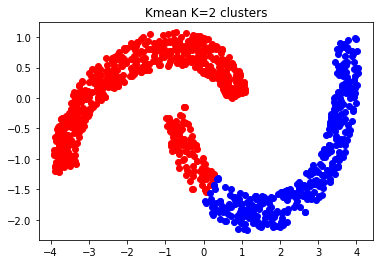

In [137]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

#plotting graph
plt.scatter(df1.x_co,df1.y_co,color='red')
plt.scatter(df2.x_co,df2.y_co,color='blue')
plt.title("Kmean K=2 clusters")
plt.show

# c) spectral clustering with k = 2 and gamma = 10

<function matplotlib.pyplot.show(close=None, block=None)>

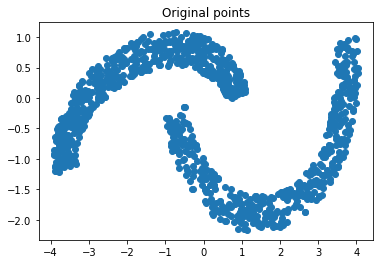

In [103]:
#scatter plot for x values
plt.scatter(x_coordinate,y_coordinate)
plt.title("Original points")
plt.show

confusion matrix for spectral clustering with gamma 10
 [[461   0]
 [  0 539]]
Accuracy for spectral clustering with gamma 10
 100.0%
Homogeneity score for spectral clustering with gamma 10
 1.00
Mutual Info Score for spectral clustering with gamma 10
 0.69
Error for spectral clustering with gamma 10
 0.0%


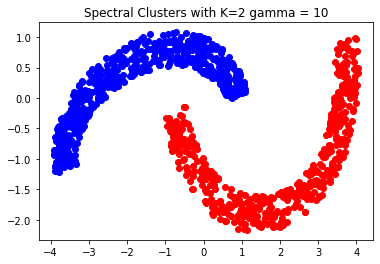

In [131]:
#Applying spectral clustering
y_pred = spectral_custom_k(data['X'],2,10)

#converting dictionary to dataframe
df = pd.DataFrame(data_dict)
df['cluster'] = y_pred
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

#plotting graph
plt.scatter(df1.x_co,df1.y_co,color='red')
plt.scatter(df2.x_co,df2.y_co,color='blue')
plt.title("Spectral Clusters with K=2 gamma = 10")
plt.show

print("confusion matrix for spectral clustering with gamma 10\n", confusion_matrix(y_true, y_pred))
print("Accuracy for spectral clustering with gamma 10\n", format(accuracy_score(y_true, y_pred),'.1%'))
print("Homogeneity score for spectral clustering with gamma 10\n", format(homogeneity_score(y_true,y_pred),'.2f'))
print("Mutual Info Score for spectral clustering with gamma 10\n", format(mutual_info_score(y_true,y_pred, contingency=None),'.2f'))
print("Error for spectral clustering with gamma 10\n", format((1-accuracy_score(y_true, y_pred)),'.1%'))

# d) Spectral clustering with gamma = 1 and gamma = 0.1

gamma = 1

confusion matrix for spectral clustering with gamma 1
 [[100 361]
 [539   0]]
Accuracy for spectral clustering with gamma 1
 10.0%
Homogeneity score for spectral clustering with gamma 1
 0.60
Mutual Info Score for spectral clustering with gamma 1
 0.41
Error for spectral clustering with gamma 1
 90.0%


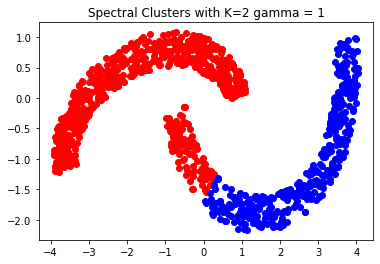

In [132]:
#Applying spectral clustering
y_pred = spectral_custom_k(data['X'],2,1)

#converting dictionary to dataframe
df = pd.DataFrame(data_dict)
df['cluster'] = y_pred
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

#plotting graph
plt.scatter(df1.x_co,df1.y_co,color='red')
plt.scatter(df2.x_co,df2.y_co,color='blue')
plt.title("Spectral Clusters with K=2 gamma = 1")
plt.show

print("confusion matrix for spectral clustering with gamma 1\n", confusion_matrix(y_true, y_pred))
print("Accuracy for spectral clustering with gamma 1\n", format(accuracy_score(y_true, y_pred),'.1%'))
print("Homogeneity score for spectral clustering with gamma 1\n", format(homogeneity_score(y_true,y_pred),'.2f'))
print("Mutual Info Score for spectral clustering with gamma 1\n", format(mutual_info_score(y_true,y_pred, contingency=None),'.2f'))
print("Error for spectral clustering with gamma 1\n", format((1-accuracy_score(y_true, y_pred)),'.1%'))

gamma = 0.1

confusion matrix for spectral clustering with gamma 0.1
 [[ 78 383]
 [449  90]]
Accuracy for spectral clustering with gamma 0.1
 16.8%
Homogeneity score for spectral clustering with gamma 0.1
 0.35
Mutual Info Score for spectral clustering with gamma 0.1
 0.24
Error for spectral clustering with gamma 0.1
 83.2%


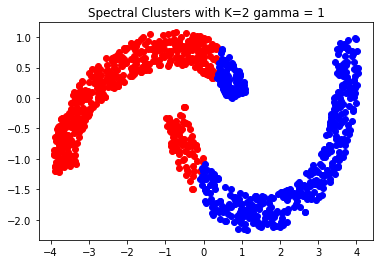

In [133]:
#Applying spectral clustering
y_pred = spectral_custom_k(data['X'],2,0.1)

#converting dictionary to dataframe
df = pd.DataFrame(data_dict)
df['cluster'] = y_pred
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

#plotting graph
plt.scatter(df1.x_co,df1.y_co,color='red')
plt.scatter(df2.x_co,df2.y_co,color='blue')
plt.title("Spectral Clusters with K=2 gamma = 1")
plt.show

print("confusion matrix for spectral clustering with gamma 0.1\n", confusion_matrix(y_true, y_pred))
print("Accuracy for spectral clustering with gamma 0.1\n", format(accuracy_score(y_true, y_pred),'.1%'))
print("Homogeneity score for spectral clustering with gamma 0.1\n", format(homogeneity_score(y_true,y_pred),'.2f'))
print("Mutual Info Score for spectral clustering with gamma 0.1\n", format(mutual_info_score(y_true,y_pred, contingency=None),'.2f'))
print("Error for spectral clustering with gamma 0.1\n", format((1-accuracy_score(y_true, y_pred)),'.1%'))